# Hillary Emain Controversy

This notebook present an introduction to text analysis : [Taming Text](https://github.com/loistal/ADA_labs/blob/master/05-%20Tamming%20Text/README.md).

In [210]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import nltk
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns

emails = pd.read_csv('./hillary-clinton-emails/emails.csv')

## WordCloud

In this part we will generate word clouds with the [wordcloud](https://github.com/amueller/word_cloud) Python library, and try to see what's the impact of text pre-processing on these clouds.

### From Raw Text

First, let's take the raw text and see what we get.

In [211]:
# Data overview
emails.head(5)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


We will take into account the `ExtractedSubject` and `ExtractedBodyText` features for the world clouds. It seems that a lot of `ExtractedBodyText` are NaN, because this column is an attempt to extract the text, but taking the `RawText` column might be wrong given that it certainly contains replies, so words that could be counted multiple times accross emails. However we choose to keep the `ExtractedSubject` column even if it contains duplicates given we can think that important topics will generate multiple mails and so important keywords should be counted multiple times. 

In [212]:
# Extract data
subject = emails['ExtractedSubject'].dropna()
body = emails['ExtractedBodyText'].dropna()

# Get a list of strings
text = list(subject) + list(body)

# Join the strings
text = ' '.join(text).lower()

We disable the built-in stopword processing to generate the cloud (we couldn't manage to disable to built-in tokenization function): 

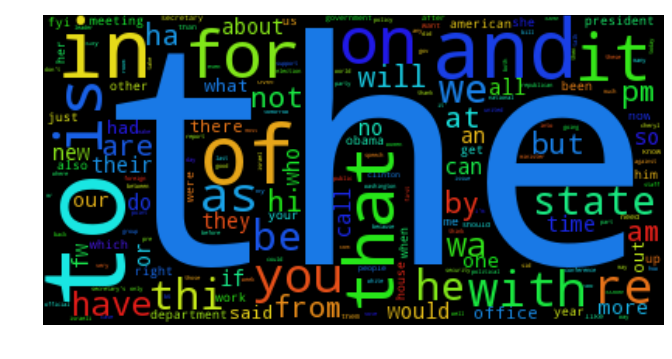

In [213]:
# Generate wordcloud without stop words
wordcloud = WordCloud(stopwords=[]).generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

As we can see, it's beautiful, but not quite satisfying. There are a lot of stop words, and irrelevant words that we want to avoid. To avoid this, we will try to perform a simple pre-processing pipeline.

### From Pre-processed Text

First, we tokenize our text with the `TweetTokenizer` from `nltk` package, a tokenizer designed and trained to tokenize tweets, but also functional for our goal : 

In [214]:
from nltk.tokenize import TweetTokenizer

tokens = TweetTokenizer().tokenize(text)
print('{} words.'.format(len(tokens)))
tokens[:10]

736853 words.


['fw', ':', 'wow', 're', ':', 'chris', 'stevens', 'fvv', ':', 'cairo']

Now we remove the stopwords and small words using the wordcloud stopwords list : 

In [215]:
from wordcloud import STOPWORDS
stopwords = list(STOPWORDS)

# Remove some arbitrary irrelevant words
irrelevant = ['one', 'two', 'will', 'said', 'also', 'pls', 'thx']
for w in irrelevant:
    stopwords.append(w)

# Filter the tokens
tokens = [w for w in tokens if w not in stopwords and len(w) > 2]
print('{} words.'.format(len(tokens)))
tokens[:10]

340186 words.


['wow',
 'chris',
 'stevens',
 'fvv',
 'cairo',
 'condemnation',
 'final',
 'meet',
 'right',
 'wing']

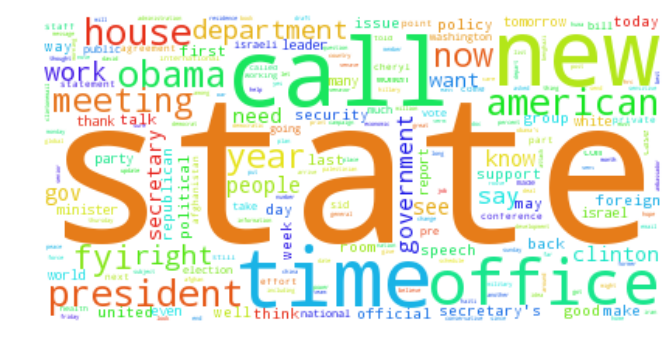

In [216]:
wordcloud = WordCloud(stopwords=[], background_color='white').generate(' '.join(tokens))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

This is way better. What if we apply some stemming processing ?

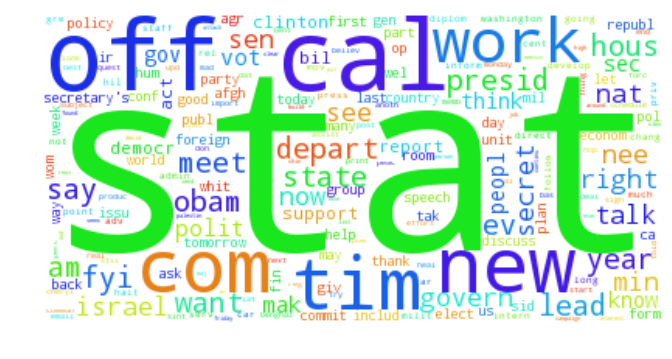

In [217]:
from nltk.stem.lancaster import LancasterStemmer

st = LancasterStemmer()
stem = list(map(lambda w : st.stem(w), tokens))

wordcloud = WordCloud(stopwords=[], background_color='white').generate(' '.join(stem))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

That's probably not very useful for our wordcloud goal, since it removes some part of the word with useful meaning in a wordcloud, like _office_ becoming _off_.

## Countries and Sentiments

The main goal of this section is to analyize the sentiment of each country in this corpus

First, we gather the possible names for each country, for example United States could be US or USA...We use [pycountry](https://pypi.python.org/pypi/pycountry/16.11.27.1).

In [218]:
countries = {}

for c in pycountry.countries:
    countries[c.name] = [c.name.lower(), c.alpha_2.lower(), c.alpha_3.lower()]
    
print('Number of countries : {}.'.format(len(countries)))
countries['Switzerland']

Number of countries : 249.


['switzerland', 'ch', 'che']

So for each of the 249 countries, we get 3 ways to represent it. We manually add some well-known acronyms for some countries : 

In [219]:
countries['United States'] += ['u.s', 'u.s.', 'u.s.a', 'u.s.a.']
countries['United Kingdom'] += ['uk', 'u.k.', 'u.k']

We choose to analyze the body text and subject : 

In [220]:
# Extract subjects and body texts 
subject = emails['ExtractedSubject'].dropna()
body = emails['ExtractedBodyText'].dropna()

# Merge subjects and bodies for sentiment analysis
mails = [x[0] + ' ' + x[1] for x in zip(subject, body)]

For each mail, we perform a sentiment analysis on the text, and look for related countries. It turns out that some of the country acronyms have actually another meaning in English, we try to avoid those side effects by manually removing those from the mail text. Also sentiment analysis is case sensitive, so we decide to make the text lowercase only for the country detection : 

In [221]:
from nltk.sentiment import vader

# Useful objects to perform analysis
vad = vader.SentimentIntensityAnalyzer()
tok = TweetTokenizer()

id = 0
sentiments = {}
coutries_stopwords = ['re', 'us', 'no', 'nor', 'ca', 'pm', 'cc', 'fm', 'tv', 'lie', 'mr', 'jordan', 'mm', 'mn', 'ai']
coutries_stopwords = set(coutries_stopwords).union(STOPWORDS)

# Take 100 first mails for development
for mail in mails[:100]: 
    # Perform sentiment analysis
    score = vad.polarity_scores(mail)['compound']
    
    # Use the lowercase and tokenized, without stopwords version to find countries
    txt = set(tok.tokenize(mail.lower())) - coutries_stopwords
    
    # Look into the concerned countries
    for country, names in countries.items():
        if not txt.isdisjoint(set(names)):
            sentiments[id] = [country, score]
            id += 1
            
df = pd.DataFrame.from_dict(sentiments, orient='index')
df.columns = ['Country', 'Sentiment']
df.head(5)

/usr/local/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Country,Sentiment
0,Libya,0.5859
1,Libya,-0.5859
2,Libya,-0.7430
3,Egypt,-0.7430
4,Libya,0.0000


Now that we gathered all the sentiments for the countries, we aggregate by country by taking the mean of the sentiments ($sentiment \in [-1, 1]$ with -1 meaning very negative and 1 very positive) : 

In [222]:
df = df.groupby('Country').agg('mean')
df.head(5)

,Sentiment
Country,
Afghanistan,0.988100
Albania,0.079667
Angola,0.243200
Antarctica,-0.476700
Armenia,0.988100


Let's plot the results : 

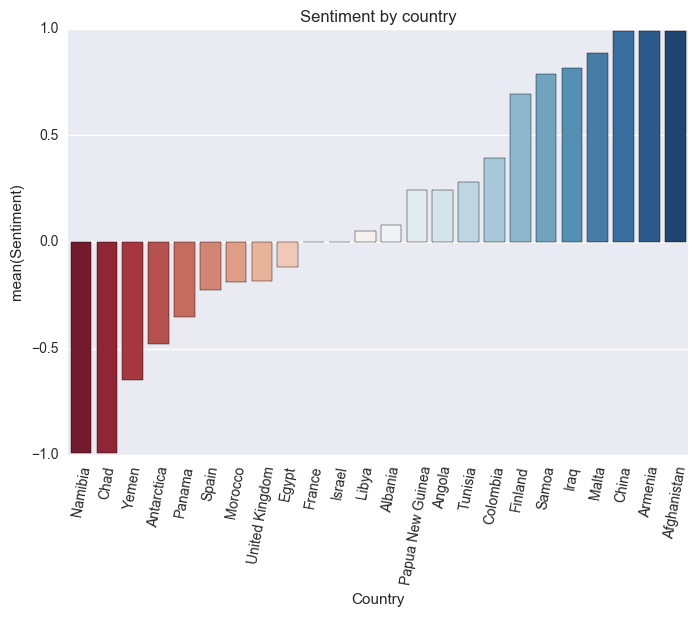

In [223]:
data = pd.Series(data=df['Sentiment']).sort_values()

plot = sns.barplot(data.index, data, palette=reversed(sns.color_palette("RdBu_r", len(data))))
plt.title('Sentiment by country')
plt.xticks(rotation=80)
plt.show()

## Topic Modeling

We are now interested in exploring the corpus through topic modeling using [gensim](https://radimrehurek.com/gensim/). We will use the `models.ldamodel` package to extract topics from the text. 

We reuse our previously generated stopword free list of tokens, and remove words that appear less than once, as they are considered insignificant.

In [224]:
from collections import defaultdict

# Count frequencies
freq = defaultdict(int)
for token in tokens:
    freq[token] += 1

# Filter the tokens
doc = [token for token in tokens if freq[token] > 1]
doc[:10]

['wow',
 'chris',
 'stevens',
 'fvv',
 'cairo',
 'condemnation',
 'final',
 'meet',
 'right',
 'wing']

We build our _gensim_ corpus out of the tokens : 

In [225]:
from gensim import corpora

# Build the dictionary 
dictionary = corpora.Dictionary([doc])

# Build the bag of words corpus
corpus = [dictionary.doc2bow(doc)]

corpus[0][:10]

/usr/local/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


[(0, 2),
 (1, 44),
 (2, 19),
 (3, 7),
 (4, 12),
 (5, 3),
 (6, 2),
 (7, 52),
 (8, 2),
 (9, 18)]

We can perform the actual modeling : 

In [226]:
from gensim.models import ldamodel

lda = ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary)

topics = lda.print_topics()

for topic in topics:
    print('Topic {} : {} \n'.format(topic[0], topic[1]))

Topic 0 : 0.006*"state" + 0.005*"call" + 0.004*"new" + 0.003*"fyi" + 0.003*"now" + 0.003*"see" + 0.003*"time" + 0.003*"office" + 0.003*"meeting" + 0.003*"obama" 

Topic 1 : 0.006*"state" + 0.005*"office" + 0.004*"call" + 0.003*"2009" + 0.003*"obama" + 0.003*"house" + 0.003*"department" + 0.003*"meeting" + 0.003*"president" + 0.003*"time" 

Topic 2 : 0.006*"state" + 0.004*"office" + 0.004*"call" + 0.004*"new" + 0.003*"meeting" + 0.003*"president" + 0.003*"people" + 0.003*"house" + 0.003*"obama" + 0.003*"time" 

Topic 3 : 0.005*"state" + 0.004*"new" + 0.004*"call" + 0.004*"president" + 0.003*"time" + 0.003*"obama" + 0.003*"office" + 0.003*"department" + 0.003*"2010" + 0.003*"now" 

Topic 4 : 0.005*"call" + 0.004*"state" + 0.004*"new" + 0.004*"fyi" + 0.004*"president" + 0.003*"house" + 0.003*"time" + 0.003*"2010" + 0.003*"obama" + 0.003*"office" 



This output represents the different topics extracted from the corpus, each word is associated with the probability of appearance in the topic, in decreasing order. For example in _topic 0_ the most likely word is **call** with 0.005 probability. It seems tiny but we should realize that this probability is computed among all the different words. 

Now that we are more familiar with _Topic Modeling_, we can try to play with the `num_topics` parameter to identify how many different meaningful topics we can extract from the corpus : 

In [ ]:
topic_range = range(5, 51)

with open("topics.txt", "w") as txt_file:
    for topic_n in topic_range:
        # Perform modeling
        lda = ldamodel.LdaModel(corpus, num_topics=topic_n, id2word = dictionary)
    
        # Get the results
        topics = lda.print_topics()
    
        # Write output to text file
        txt_file.write('Modeling for {} topics : ({} topics found) \n'.format(topic_n, len(topics)))
        for topic in topics:
            txt_file.write('\t - Topic {} : {} \n'.format(topic[0], topic[1]))
        txt_file.write('-'*10 + '\n \n')

You can find the output in the `topics.txt` file.

We observe that the topics are very similar. Also, 20 is the maximum number of topics the model manage to extract, i.e. with `num_topics > 20`, we always get 20 topics back.

+TODO 

## Bonus : Communication Graph

This part is a tentative to build and analyse the communication graph from the email corpus. We will use the [NetworkX](https://networkx.github.io) library. 

Let's first extract the senders from the `Emails.csv` file : 

In [238]:
# Extract senders and mail ID's 
senders = emails[['Id', 'SenderPersonId']].rename(index=str, columns={'Id' : 'EmailId'})

print('{} % are NaN values.'.format(senders['SenderPersonId'].isnull().sum() / len(senders)))

# Drop the NaN values
senders = senders[senders['SenderPersonId'].notnull()]

# Set the ID's as integers
senders['SenderPersonId'] = senders['SenderPersonId'].astype(int)
senders.head()

0.019760855884203902 % are NaN values.


,EmailId,SenderPersonId
0,1,87
2,3,32
3,4,32
4,5,80
5,6,80


Now we generate the same Dataframe for receveirs, which is easy with the `EmailReceivers.csv` file : 

In [239]:
# Import the file
receivers = pd.read_csv('./hillary-clinton-emails/EmailReceivers.csv')

# Change a bit the form 
receivers = receivers[['EmailId', 'PersonId']].rename(index=str, columns={'PersonId' : 'ReceiverPersonId'})

print('{} % are NaN values.'.format(receivers['ReceiverPersonId'].isnull().sum() / len(receivers)))
receivers.head()

0.0 % are NaN values.


,EmailId,ReceiverPersonId
0,1,80
1,2,80
2,3,228
3,3,80
4,4,80


Now we need to merge these Dataframe and aggregate information by email ID : 

In [240]:
# Merge Dataframes
relations = senders.merge(receivers, on=['EmailId'], how='outer')
relations.head()

,EmailId,SenderPersonId,ReceiverPersonId
0,1.0,87.0,80.0
1,3.0,32.0,228.0
2,3.0,32.0,80.0
3,4.0,32.0,80.0
4,5.0,80.0,81.0


We can start to build the _undirected_ _unweighted_ graph. It's pretty easy with `networkX` since we can create a graph by passing a list of tuples : 

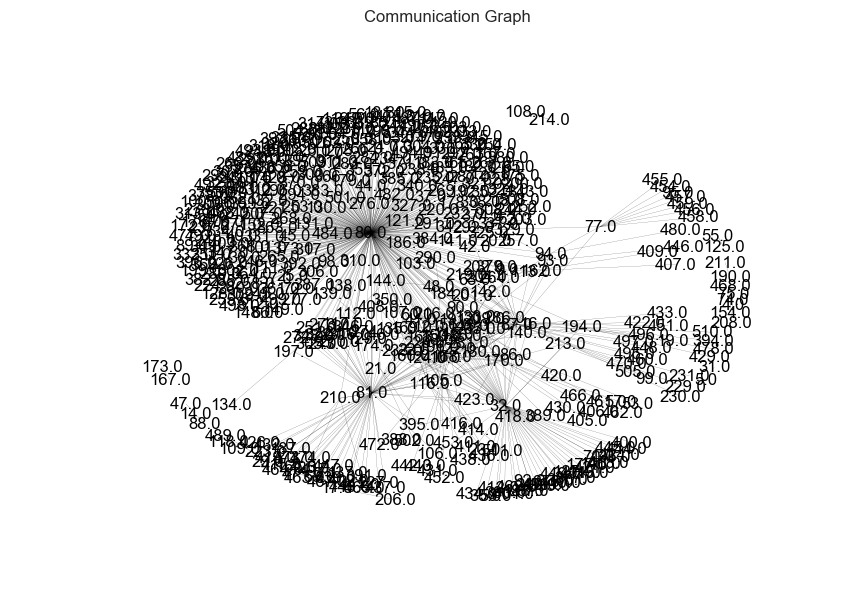

In [241]:
import networkx as nx

# Get the nodes we can't add directly by edge
isolated_receivers = list(relations[relations['SenderPersonId'].isnull()]['ReceiverPersonId'])
isolated_senders = list(relations[relations['ReceiverPersonId'].isnull()]['SenderPersonId'])

# Generate the list of tuple
relations = relations.dropna()
edges = list(zip(relations['SenderPersonId'], relations['ReceiverPersonId']))

# Create the graph
graph = nx.Graph()
graph.add_edges_from(edges)
graph.add_nodes_from(isolated_receivers + isolated_senders)
graph.remove_nodes_from(nx.isolates(graph))

# Plot
options = {
 'with_labels': True,
 'node_size': 0,
 'linewidths': 0,
 'width': 0.1,
}
nx.draw(graph, **options)
plt.title('Communication Graph')
plt.show()

It's not really readable with so many nodes but at least we have an idea of the central persons in the network, like the ID number 80.

In [242]:
# Import the IDs translation
persons = pd.read_csv('./hillary-clinton-emails/Persons.csv')
tmp = persons[persons['Id'] == 80].iloc[0]
print('ID {} → {}.'.format(tmp['Id'], tmp['Name']))

ID 80 → Hillary Clinton.


How surprising 😲

We try to find communities with the [community](http://perso.crans.org/aynaud/communities/index.html) module : 

Number of communities : 18.


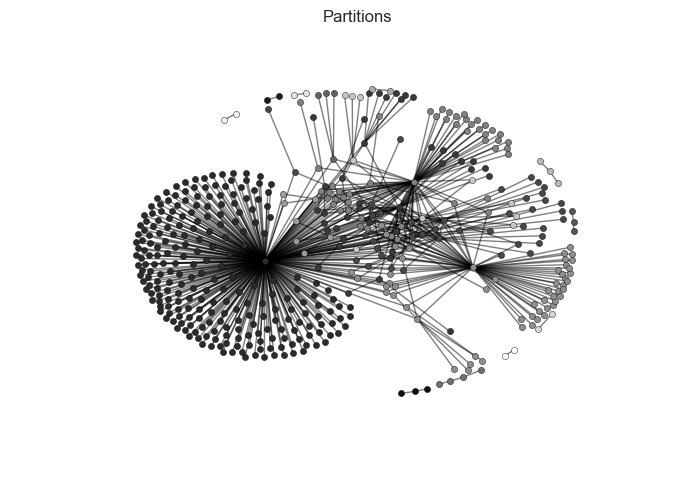

In [243]:
import community

# Find best partition
partition = community.best_partition(graph)

# Thanks to the community website
size = float(len(set(partition.values())))
print('Number of communities : {}.'.format(int(size)))
pos = nx.spring_layout(graph)
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(graph, pos, list_nodes, node_size=20, node_color=str(count / size))

nx.draw_networkx_edges(graph, pos, alpha=0.5)
plt.title('Partitions')
plt.axis('off')
plt.show()

Now we have to find the 20 most frequent words used by each community in the emails.

First, we transform our data to get text for each partition :

In [244]:
# Select interesting columns 
df = emails[['SenderPersonId', 'ExtractedSubject', 'ExtractedBodyText']]

# Keep row with non-null sender and text
df = df[df['SenderPersonId'].notnull()]
df = df.dropna(how='all', subset=['ExtractedSubject', 'ExtractedBodyText']).fillna('')

# Concatenate text and subject
df['Text'] = df['ExtractedSubject'] + ' ' + df['ExtractedBodyText']
df.drop(['ExtractedSubject', 'ExtractedBodyText'], axis=1, inplace=True)

# Aggregate by sender id
df = df.groupby('SenderPersonId').agg(lambda x: ' '.join(x)).reset_index()

# Map to partitions
def sender_to_partition(sender):
    try:
        return partition[sender]
    except:
        # If key error, it's an isolated node
        return None

df['partition'] = df['SenderPersonId'].apply(sender_to_partition)
df.drop(['SenderPersonId'], axis=1, inplace=True)

# Aggregate by partition
df = df.groupby('partition').agg(lambda x: ' '.join(x)).reset_index()
df.head()

,partition,Text
0,2.0,Re: Happy Easter S000 good the old. E mail is ...
1,3.0,"Madam Secretary,\nShapiro, Andrew J <ShapiroA..."
2,4.0,"Anne-Marie Slaughter\nSunday, March 13, 2011 ..."
3,6.0,My hair is getting whiter by the minute watch...
4,7.0,"Cc: Cheryl, Doug, Justin\nThere is a context ..."


We can now count the words : 

In [245]:
# Transform dataframe to dictionary
partition_dic = df.to_dict(orient='index')

In [246]:
frequencies = {}
for idx, value in partition_dic.items():
    com = value['partition']
    text = value['Text'].lower()
    
    # Preprocess the text
    tokens = TweetTokenizer().tokenize(text)
    tokens = [w for w in tokens if w not in stopwords and len(w) > 2]
    
    # Build a pd.Series out of it
    serie = pd.Series(tokens)
    
    # Take the most frequent words
    frequencies[com] = list(serie.value_counts()[:20].index)

In [247]:
for part, freq in frequencies.items():
    print('Partition {} : \n{} \n'.format(part, freq))

Partition 16.0 : 
['nyt', 'case', 'book', 'piece', 'little', 'give', 'anyone', 'send', 'away', "s's", 'eric', 'etc', 'complete', 'read', 'make', 'tonight', 'brainstorm', 'simon', 'gather', 'greece'] 

Partition 2.0 : 
['call', 'see', 'know', '<hrod17@clintonemail.com>', 'print', '2009', 'talk', 'time', 'state', '2010', 'tomorrow', 'schedule', 'work', 'pis', 'now', 'good', 'need', 'speech', 'today', 'want'] 

Partition 3.0 : 
['state', 'fyi', 'agreement', 'call', 'united', 'states', 'benghazi', 'department', 'case', 'people', 'work', 'president', 'house', 'subject', 'information', 'security', 'government', 'date', 'secretary', 'statement'] 

Partition 4.0 : 
['state', 'women', 'new', 'clinton', '2010', 'foreign', 'work', 'now', 'think', 'policy', 'time', 'know', 'afghanistan', 'house', 'people', 'president', 'department', 'secretary', 'government', 'see'] 

Partition 6.0 : 
['women', 'richards', 'new', 'says', 'years', 'people', 'first', 'place', 'life', 'jamal', 'fisa', 'time', 'day', 

We can clearly see similarities with the Topic Modeling part with different topics about _obama_, _office_, _president_, _work_...

We also notice that we lost some communities during the process... This can be due to the fact that some communities are small and not relavant, created from almost isolated nodes.
